In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('medical_cost_insurance.csv')
df.head()

print(df.shape)


(1338, 7)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df1=df.drop('region', axis=1)
df1['sex']=df['sex'].replace({'male':1, 'female':0})
df1['smoker']=df['smoker'].replace({'yes':1, 'no':0})

df1

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


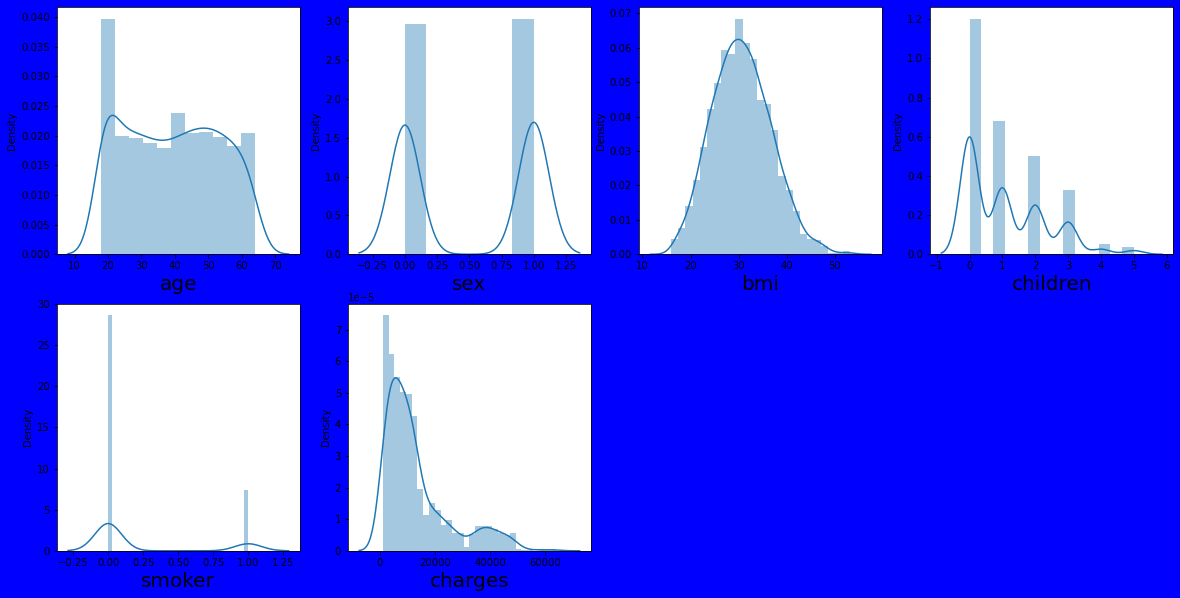

In [7]:
plt.figure(figsize=(20,10), facecolor='blue')		
plotnumber=1		
		
for column in df1:		
	if plotnumber<=8:	
		ax=plt.subplot(2,4,plotnumber)
		sns.distplot(df1[column])
		plt.xlabel(column,fontsize=20)
		
	plotnumber+=1	
plt.show()		


In [8]:
x=df1.drop(columns=['charges'])
y=df1.charges


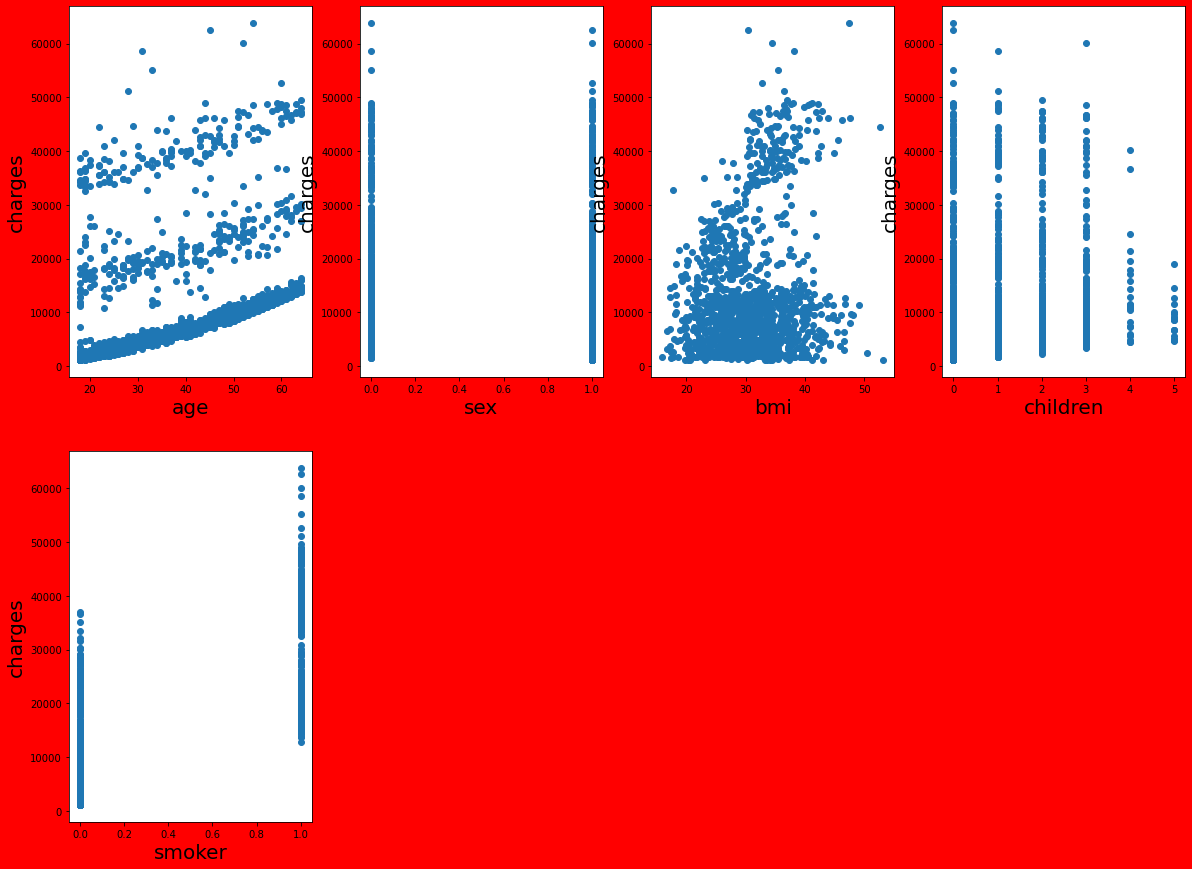

In [9]:
plt.figure(figsize=(20,15), facecolor='red')			
plotnumber=1			
			
for column in x:			
	if plotnumber<=8:		
		ax=plt.subplot(2,4,plotnumber)	
		plt.scatter(x[column], y)	
		plt.xlabel(column,fontsize=20)	
		plt.ylabel('charges',fontsize=20)	
			
	plotnumber+=1		
plt.show()			


In [10]:
scaler=StandardScaler()
X_Scaled=scaler.fit_transform(x)
X_Scaled


array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663]])

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y, test_size=0.25, random_state=333)
y_train.head()


532    12925.8860
713     1984.4533
673     6185.3208
846     9872.7010
207    20984.0936
Name: charges, dtype: float64

In [35]:
regression=LinearRegression()
regression.fit(x_train, y_train)


LinearRegression()

In [40]:
print('charges:', regression.predict(scaler.transform([[19,0,27.9,0,1]])))


charges: [25133.01476936]


In [39]:
regression.score(x_test, y_test) *100

77.22238524251796